In [1]:
import pandas as pd
import numpy as np

In [5]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Victoria_InsideAirBnB_Data.csv')

In [7]:
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1591,https://www.airbnb.com/rooms/1591,20210226071848,2021-02-26,Garden Suite-King-Ensuite,Relax and unwind at Abbeymoore Manor perfectly...,Welcome to Abbeymoore Manor<br /><br />Abbeymo...,https://a0.muscache.com/pictures/74e63878-b71c...,1748,https://www.airbnb.com/users/show/1748,Jeff,2008-08-11,"Victoria, British Columbia, Canada",I am innkeeper Jeff....\r\nI own and operate A...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/aeb69...,https://a0.muscache.com/im/pictures/user/aeb69...,NaN,6,6,"['email', 'phone', 'work_email']",t,f,"Victoria, British Columbia, Canada",Rockland,Victoria,48.42128,-123.33932,Private room in bed and breakfast,Private room,4,NaN,1 private bath,1.0,2.0,"[""Essentials"", ""Oven"", ""Refrigerator"", ""Hot wa...",$149.00,1,356,1,7,356,356,3.8,356.0,NaN,t,0,3,30,302,2021-02-26,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,8,1,7,0,NaN
1,19898,https://www.airbnb.com/rooms/19898,20210226071848,2021-02-27,Duchess Suite,<b>The space</b><br />The original Master Bedr...,NaN,https://a0.muscache.com/pictures/101822/ae950f...,69729,https://www.airbnb.com/users/show/69729,Ryan,2010-01-11,CA,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/69729/profile...,https://a0.muscache.com/im/users/69729/profile...,NaN,4,4,"['email', 'phone']",t,f,NaN,Rockland,Victoria,48.42515,-123.33977,Private room in apartment,Private room,1,NaN,1 bath,1.0,1.0,"[""Refrigerator"", ""Cable TV"", ""Free parking on ...",$279.00,2,30,2,2,30,30,2.0,30.0,NaN,f,0,0,0,0,2021-02-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
2,41168,https://www.airbnb.com/rooms/41168,20210226071848,2021-02-26,"Burma Suite, Ocean Island Garden Suites","Our Burma Suite is a bright, fun apartment dec...","Our Suites are located in beautiful James Bay,...",https://a0.muscache.com/pictures/miso/Hosting-...,173169,https://www.airbnb.com/users/show/173169,Ocean Island Garden Suites,2010-07-19,"Victoria, British Columbia, Canada",“A seriously good deal for groups of up to fou...,within a few hours,100%,87%,f,https://a0.muscache.com/im/users/173169/profil...,https://a0.muscache.com/im/users/173169/profil...,NaN,5,5,"['email', 'phone', 'reviews']",t,t,"Victoria, British Columbia, Canada",James Bay,Victoria,48.41333,-123.37065,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,0.0,"[""Essentials"", ""Long term stays allowed"", ""Hea...",$107.00,28,90,28,28,90,90,28.0,90.0,NaN,t,0,0,0,0,2021-02-26,20,1,0,2013-07-04,2020-08-30,82.0,8.0,9.0,9.0,10.0,9.0,8.0,NaN,f,3,3,0,0,0.21
3,47421,https://www.airbnb.com/rooms/47421,20210226071848,2021-02-26,Downtown by the Park,<b>The space</b><br />This one bedroom apartme...,NaN,https://a0.muscache.com

In [14]:
selected_columns = df[['price','bedrooms','beds','bathrooms','bathrooms_text','accommodates','latitude', 'longitude']]

In [15]:
ml_df = pd.DataFrame(selected_columns).copy()
ml_df

,price,bedrooms,beds,bathrooms,bathrooms_text,accommodates,latitude,longitude
0,$149.00,1.0,2.0,NaN,1 private bath,4,48.42128,-123.33932
1,$279.00,1.0,1.0,NaN,1 bath,1,48.42515,-123.33977
2,$107.00,1.0,0.0,NaN,1 bath,3,48.41333,-123.37065
3,$100.00,1.0,1.0,NaN,1 bath,2,48.42106,-123.36340
4,$89.00,2.0,2.0,NaN,1 bath,3,48.42151,-123.36383
...,...,...,...,...,...,...,...,...
2878,$175.00,NaN,1.0,NaN,1 bath,2,48.76854,-123.30361
2879,$210.00,NaN,1.0,NaN,1 bath,4,48.80286,-123.32028
2880,$225.00,1.0,4.0,NaN,1 bath,8,48.80397,-123.32176
2881,$68.00,NaN,1.0,NaN,1 bath,4,48.45151,-123.49255


In [17]:
df['bedrooms'].describe()

count    2612.000000
mean        1.668070
std         0.960183
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: bedrooms, dtype: float64

In [22]:
df['bathrooms'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: bathrooms, dtype: float64

In [25]:
df['bathrooms_text'][0][0]

'1'

In [49]:
ml_df['baths'] = ml_df['bathrooms_text'].str[0]

In [39]:
type(ml_df['baths'][0])

str

In [52]:
ml_df[ml_df['baths'] == 'S']

,price,bedrooms,beds,bathrooms,bathrooms_text,accommodates,latitude,longitude,baths
452,$60.00,1.0,2.0,NaN,Shared half-bath,2,48.41971,-123.37875,S
453,$84.00,1.0,2.0,NaN,Shared half-bath,3,48.42062,-123.37840,S


In [55]:
ml_df[ml_df['baths'].str.isalpha()]

,price,bedrooms,beds,bathrooms,bathrooms_text,accommodates,latitude,longitude,baths
101,$70.00,1.0,1.0,NaN,Private half-bath,2,48.80827,-123.42976,P
112,$185.00,1.0,1.0,NaN,Half-bath,3,48.66661,-123.40765,H
127,$90.00,1.0,3.0,NaN,Half-bath,3,48.44453,-123.34121,H
141,$48.00,1.0,1.0,NaN,Half-bath,2,48.87632,-123.54302,H
411,$85.00,1.0,1.0,NaN,Half-bath,2,48.84600,-123.49887,H
452,$60.00,1.0,2.0,NaN,Shared half-bath,2,48.41971,-123.37875,S
453,$84.00,1.0,2.0,NaN,Shared half-bath,3,48.42062,-123.37840,S
861,$121.00,NaN,0.0,NaN,Half-bath,2,48.42927,-124.06888,H
1063,$162.00,2.0,2.0,NaN,Half-bath,4,48.42445,-124.07280,H
1167,$120.00,1.0,2.0,NaN,Half-bath,3,48.42486,-124.06922,H


In [79]:
def a2n(string):
    if string == 'P':
        string = '1'
    elif string == 'H':
        string = '1'
    elif string == 'S':
        string = '1'
    else:
        string = string
    return string


In [80]:
a2n('3')

'3'

In [81]:
ml_df['baths'] = ml_df['baths'].apply(lambda x: a2n(x))

In [82]:
ml_df[ml_df['baths'].str.isalpha()]

,price,bedrooms,beds,bathrooms,bathrooms_text,accommodates,latitude,longitude,baths


In [88]:
type(df['price'][0])

str

In [119]:
def currency_conv(text):
    text = "".join([char for char in text if char not in ('$',',')])
    return float(text)

currency_conv('$45.55')

45.55

In [110]:
ml_df[ml_df['bedrooms'].isna()]

,price,bedrooms,beds,bathrooms,bathrooms_text,accommodates,latitude,longitude,baths
5,$90.00,NaN,1.0,NaN,1 bath,2,48.428520,-123.369610,1
22,$72.00,NaN,2.0,NaN,1 bath,4,48.412630,-123.377020,1
24,$66.00,NaN,1.0,NaN,1 bath,2,48.426110,-123.340470,1
32,$69.00,NaN,1.0,NaN,1 bath,2,48.412920,-123.377740,1
43,$69.00,NaN,1.0,NaN,1 bath,3,48.426240,-123.340190,1
...,...,...,...,...,...,...,...,...,...
2874,$96.00,NaN,2.0,NaN,1 bath,3,48.432260,-123.393220,1
2875,$96.00,NaN,0.0,NaN,1 bath,2,48.565778,-123.450922,1
2878,$175.00,NaN,1.0,NaN,1 bath,2,48.768540,-123.303610,1
2879,$210.00,NaN,1.0,NaN,1 bath,4,48.802860,-123.320280,1


In [112]:
ml_df['bedrooms'] = ml_df['bedrooms'].dropna()

In [113]:
ml_df

,price,bedrooms,beds,bathrooms,bathrooms_text,accommodates,latitude,longitude,baths
0,$149.00,1.0,2.0,NaN,1 private bath,4,48.42128,-123.33932,1
1,$279.00,1.0,1.0,NaN,1 bath,1,48.42515,-123.33977,1
2,$107.00,1.0,0.0,NaN,1 bath,3,48.41333,-123.37065,1
3,$100.00,1.0,1.0,NaN,1 bath,2,48.42106,-123.36340,1
4,$89.00,2.0,2.0,NaN,1 bath,3,48.42151,-123.36383,1
...,...,...,...,...,...,...,...,...,...
2878,$175.00,NaN,1.0,NaN,1 bath,2,48.76854,-123.30361,1
2879,$210.00,NaN,1.0,NaN,1 bath,4,48.80286,-123.32028,1
2880,$225.00,1.0,4.0,NaN,1 bath,8,48.80397,-123.32176,1
2881,$68.00,NaN,1.0,NaN,1 bath,4,48.45151,-123.49255,1


In [114]:
ml_df[ml_df['bedrooms'].isna()]

,price,bedrooms,beds,bathrooms,bathrooms_text,accommodates,latitude,longitude,baths
5,$90.00,NaN,1.0,NaN,1 bath,2,48.428520,-123.369610,1
22,$72.00,NaN,2.0,NaN,1 bath,4,48.412630,-123.377020,1
24,$66.00,NaN,1.0,NaN,1 bath,2,48.426110,-123.340470,1
32,$69.00,NaN,1.0,NaN,1 bath,2,48.412920,-123.377740,1
43,$69.00,NaN,1.0,NaN,1 bath,3,48.426240,-123.340190,1
...,...,...,...,...,...,...,...,...,...
2874,$96.00,NaN,2.0,NaN,1 bath,3,48.432260,-123.393220,1
2875,$96.00,NaN,0.0,NaN,1 bath,2,48.565778,-123.450922,1
2878,$175.00,NaN,1.0,NaN,1 bath,2,48.768540,-123.303610,1
2879,$210.00,NaN,1.0,NaN,1 bath,4,48.802860,-123.320280,1


In [120]:
ml_df = ml_df[ml_df['bedrooms'].notna()]
ml_df['price'] = ml_df['price'].apply(lambda x: currency_conv(x))

In [121]:
ml_df

,price,bedrooms,beds,bathrooms,bathrooms_text,accommodates,latitude,longitude,baths
0,149.0,1.0,2.0,NaN,1 private bath,4,48.42128,-123.33932,1
1,279.0,1.0,1.0,NaN,1 bath,1,48.42515,-123.33977,1
2,107.0,1.0,0.0,NaN,1 bath,3,48.41333,-123.37065,1
3,100.0,1.0,1.0,NaN,1 bath,2,48.42106,-123.36340,1
4,89.0,2.0,2.0,NaN,1 bath,3,48.42151,-123.36383,1
...,...,...,...,...,...,...,...,...,...
2873,215.0,2.0,2.0,NaN,2 baths,4,48.37687,-123.71806,2
2876,90.0,1.0,1.0,NaN,1 bath,2,48.44279,-123.38698,1
2877,100.0,1.0,2.0,NaN,1 bath,4,48.42604,-123.36237,1
2880,225.0,1.0,4.0,NaN,1 bath,8,48.80397,-123.32176,1


In [128]:
# All prices are current - GOOD
df['last_scraped'].apply(lambda x: year(x)).value_counts()

2021    2883
Name: last_scraped, dtype: int64

In [127]:
def year(string):
    string = string[0:4]
    return string

Coefficients: 
 [ 82.40443655 122.93641412 299.25891332 -32.04871351]
Mean squared error: 731807.50
Coefficient of determination: 0.03


ValueError: x and y must be the same size

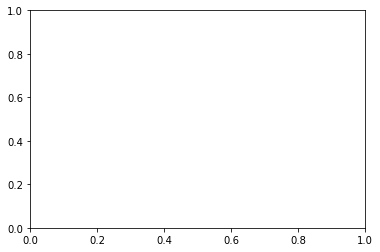

In [146]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.model_selection as model_selection

from sklearn.model_selection import train_test_split

# Split dataset into training set and test set, 70/30
X_train, X_test, y_train, y_test = train_test_split(ml_df[['bedrooms','baths','latitude','longitude']], ml_df['price'], test_size=0.33,random_state=109) 

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [147]:
y = pd.DataFrame(y_test)

In [148]:
y['pricepred'] = y_pred

In [150]:
y.head(60)

,price,pricepred
1150,72.0,76.893565
2792,200.0,80.779317
2782,82.0,65.620122
2646,137.0,182.106543
2694,135.0,231.196736
1479,90.0,78.324744
2581,50.0,75.033620
1794,250.0,273.144454
719,235.0,225.896983
1255,139.0,271.928074
